In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
from tqdm import tqdm
from torchvision import models,transforms
from PIL import Image
import cv2
import sys
import json
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import os
import os.path as osp
from glob import glob
import pandas as pd

In [3]:
#モデル追加
net=models.vgg16_bn(pretrained=False)
save_path='/content/drive/MyDrive/Colab Notebooks/geiot/weight_fine_tuning_VGG_2Way.pth'
net.classifier.add_module("7",nn.Linear(in_features=1000,out_features=2))
net.load_state_dict(torch.load(save_path))
#net.add_module("last_fc",nn.Linear(1000,101,bias=False))

<All keys matched successfully>

In [4]:
transforms_func=transforms.Compose([transforms.Resize([224,224]),transforms.ToTensor(), 
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

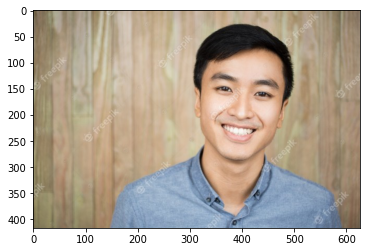

In [11]:
img=Image.open("/content/drive/MyDrive/Colab Notebooks/geiot/XXX.jpeg")
plt.imshow(img)

In [12]:
img=transforms_func(img)
img=torch.unsqueeze(img,0)


In [13]:
net.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [14]:
pred=net(img)

In [15]:
print("ストレス値:",nn.functional.softmax(pred,1).detach().numpy()[0,0],"%")

ストレス値: 3.1119038e-07 %
